In [168]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score


<Axes: xlabel='x_2', ylabel='Count'>

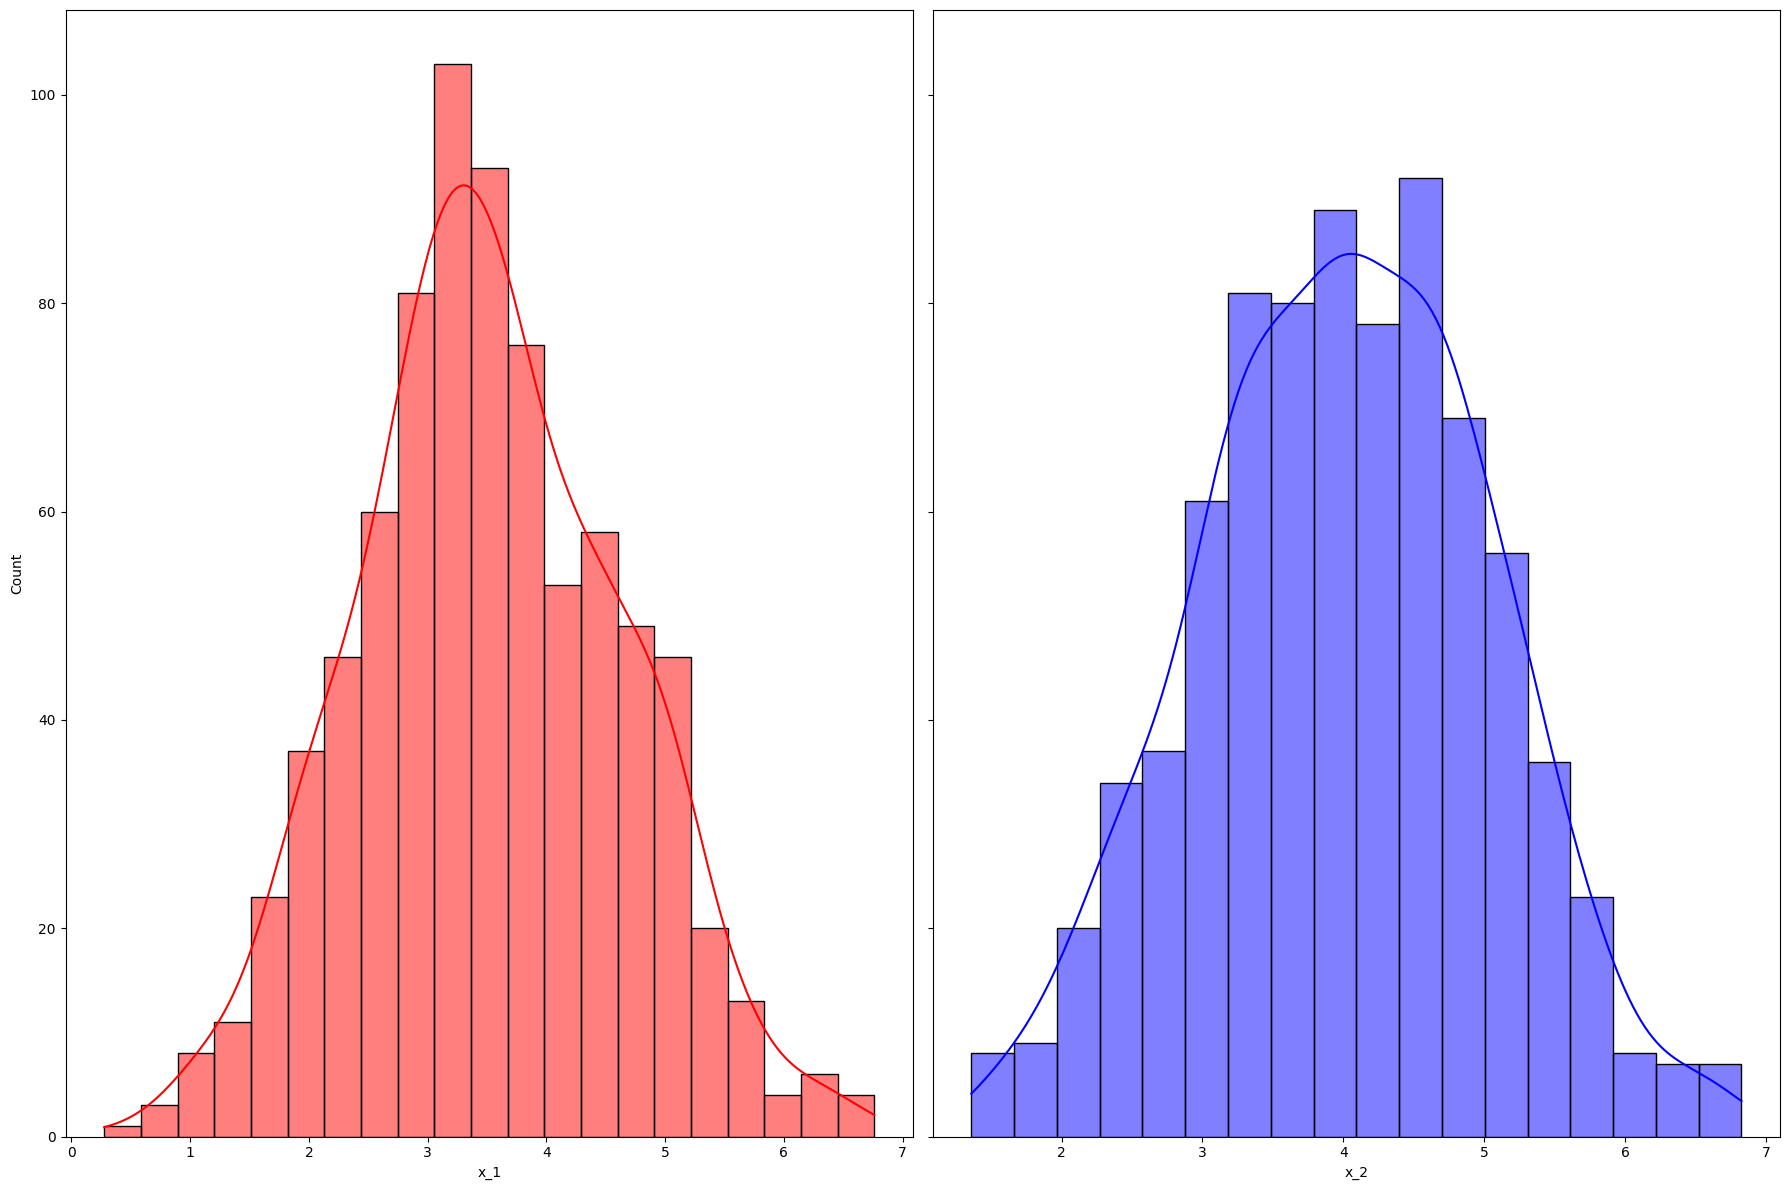

In [169]:
df=pd.read_csv('ds1_train.csv')
threshold = 3
df['x_2'] = np.log(df['x_2'])
# Remove outliers from the first two columns and keep the last column unchanged
filtered_rows = (abs(df['x_1'] - df['x_1'].mean()) <= threshold * df['x_1'].std()) & \
                (abs(df['x_2'] - df['x_2'].mean()) <= threshold * df['x_2'].std())

df = df[filtered_rows]

scaler=RobustScaler()
X1=df[['x_1','x_2']].values
# X1=scaler.fit_transform(X1)
df['x_1']=X1[:,0]
df['x_2']=X1[:,1]
Y1=df[['y']].values
X1=np.array(X1)
Y1=np.array(Y1)
col=df.columns
df2=pd.read_csv('ds1_test.csv')
df2['x_2'] = np.log(df2['x_2'])
X_test=df2[['x_1','x_2']].values
# X_test=scaler.transform(X_test)
Y_test=df2[['y']].values
fig,axes=plt.subplots(1,2,figsize=(18,12),sharey=True)
sns.histplot(df,ax=axes[0],x="x_1",kde=True,color='r')
sns.histplot(df,ax=axes[1],x="x_2",kde=True,color='b')


In [170]:
def get_prior(df2):
 label=np.unique(df2['y'])
 prior=np.zeros(len(label))
 for i in label:
    df_label=df2[df2['y']==round(i)]
    prior[round(i)]=len(df_label)/len(df2)
 return prior

In [171]:


def get_likelhood_x_y(df,label,mark,val,k):
    get_x=df[df['y']==mark]
    mean=get_x[label].mean()
    std=get_x[label].std()+k
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [172]:

def  GNB(df, X, Y,k):
    # get feature names
    features = list(df.columns)[:-1]
    # calculate prior
    prior = get_prior(df)
    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= get_likelhood_x_y(df, features[i],labels[j],x[i],k)
        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j]*prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 


In [173]:
def f1score(y_pred_class,x,y_true):
    tp=0
    fp=0
    fn=0
    tn=0
    y_pred_class=np.array(y_pred_class).T
    for i in range(x.shape[0]):
        if y_pred_class[i]==1 :
            if y_true[i]==1:
                tp+=1
            else :
                fp+=1
        else:
            if y_true[i]==1:
                fn+=1
            else :
                tn+=1
    f1=tp/(tp+(1/2)*(fp+fn))
    return f1


In [174]:

Y_pred=GNB(df,X_test,'y',0.00001)
print(f1score(Y_pred,X_test,Y_test))

0.9411764705882353


In [175]:

import random
costy=[]
def HyperTune(evaluation):
    for i in range(1,30):
        df1=df
        acc=0
        for j in range(0,5):
            random_row = df1.sample(n=700)
            rest= df1.drop(random_row.index).reset_index(drop=True)
            random_row.reset_index(drop=True,inplace=True)
            rest.reset_index(drop=True,inplace=True)
            Y_true=np.array(rest[['y']])
            X=np.array(rest[['x_1','x_2']])
            Y_pred=GNB(random_row,X,'y',i/100000)
            if evaluation=='f1score':
                p=f1score(Y_pred,rest,Y_true)
            else:
                p=accuracy_score(Y_pred,Y_true)
            acc+=p
        cost1=acc/5
        acc=0
        costy.append(cost1)
    



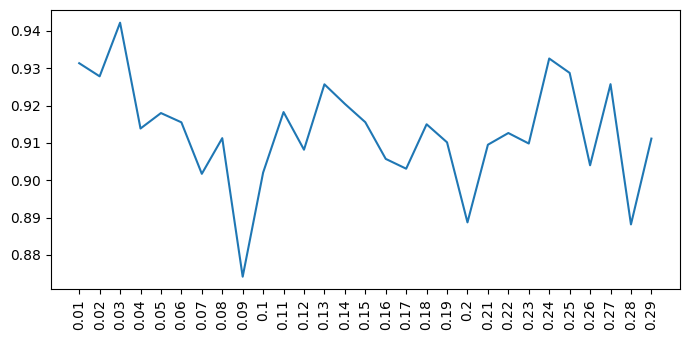

In [176]:
costy=[]
HyperTune('f1score')
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x=[]
for i in range(1,30):
    x.append(i/100)
y2 = costy
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y2)
plt.xticks(default_x_ticks, x,rotation='vertical')
plt.show()
costy=[]

In [177]:
Y_pred=GNB(df,X_test,'y',0.03)
print(f1score(Y_pred,X_test,Y_test))

0.9411764705882353


In [178]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
GNB=GaussianNB()
GNB.fit(X1,Y1)
Y_pred=GNB.predict(X_test)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [179]:
print(accuracy_score(Y_pred,Y_test))
print(f1score(Y_pred,X_test,Y_test))

0.94
0.9411764705882353
